In [3]:
#Modify the import and API key retrieval cell
import pandas as pd
from googleapiclient.discovery import build
import os
from dotenv import load_dotenv

# Load environment variables from .env file (if exists)
load_dotenv()

# Get API key from environment variable
API_KEY = os.environ.get('YOUTUBE_API_KEY')

In [4]:

def get_trending_videos(api_key, max_results=200):
     # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

     # initialize the list to hold video details
    videos = []

     # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='CA',  
        maxResults=50
    )

     # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

         # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos_CA.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos_CA.csv


In [5]:
import pandas as pd

trending_videos = pd.read_csv('trending_videos_CA.csv')
print(trending_videos.head())

      video_id                                              title  \
0  imMbPxcL8NY  Sprint Qualifying Highlights | 2025 Chinese Gr...   
1  j-RpvIuazmc  Stromae, Pomme - “Ma Meilleure Ennemie” (from ...   
2  4Dr5PPhgoas  BRASIL vs. COLOMBIA [2-1] | RESUMEN | ELIMINAT...   
3  ECqGCH1TfLY                     j-hope ‘MONA LISA’ Official MV   
4  NYH3pAYRrBM  Selena Gomez and benny blanco Burn With Love W...   

                                         description          published_at  \
0  Catch up on qualifying for our first Sprint of...  2025-03-21T08:51:14Z   
1  Stream “Ma Meilleure Ennemie” from the Arcane ...  2025-03-20T15:55:06Z   
2  Vitória de quem acreditou até o último minuto!...  2025-03-21T03:50:48Z   
3  j-hope ‘MONA LISA’\n💽 Listen now: https://jhop...  2025-03-21T03:59:08Z   
4  Selena Gomez and Benny Blanco are both pop-cul...  2025-03-20T15:00:33Z   

                 channel_id      channel_title  category_id  \
0  UCB_qr75-ydFVKSF9Dmo6izg          FORMULA 1       

In [6]:
 # check for missing values
missing_values = trending_videos.isnull().sum()

 # display data types
data_types = trending_videos.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       0
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

In [7]:
 # fill missing descriptions with "No description"
trending_videos['description'].fillna('No description', inplace=True)

 # convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

 # convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_20932/1489038506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace=True)


In [8]:
 # descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,2.000000e+02,200.000000,200.0,200.000000
mean,2.096866e+06,83793.955000,0.0,5613.020000
std,3.226301e+06,142505.216131,0.0,9158.135951
min,6.605800e+04,0.000000,0.0,0.000000
25%,5.509582e+05,16894.750000,0.0,1186.000000
50%,1.047295e+06,35900.500000,0.0,2853.000000
75%,2.100107e+06,81636.750000,0.0,5716.250000
max,2.698701e+07,943662.000000,0.0,72546.000000


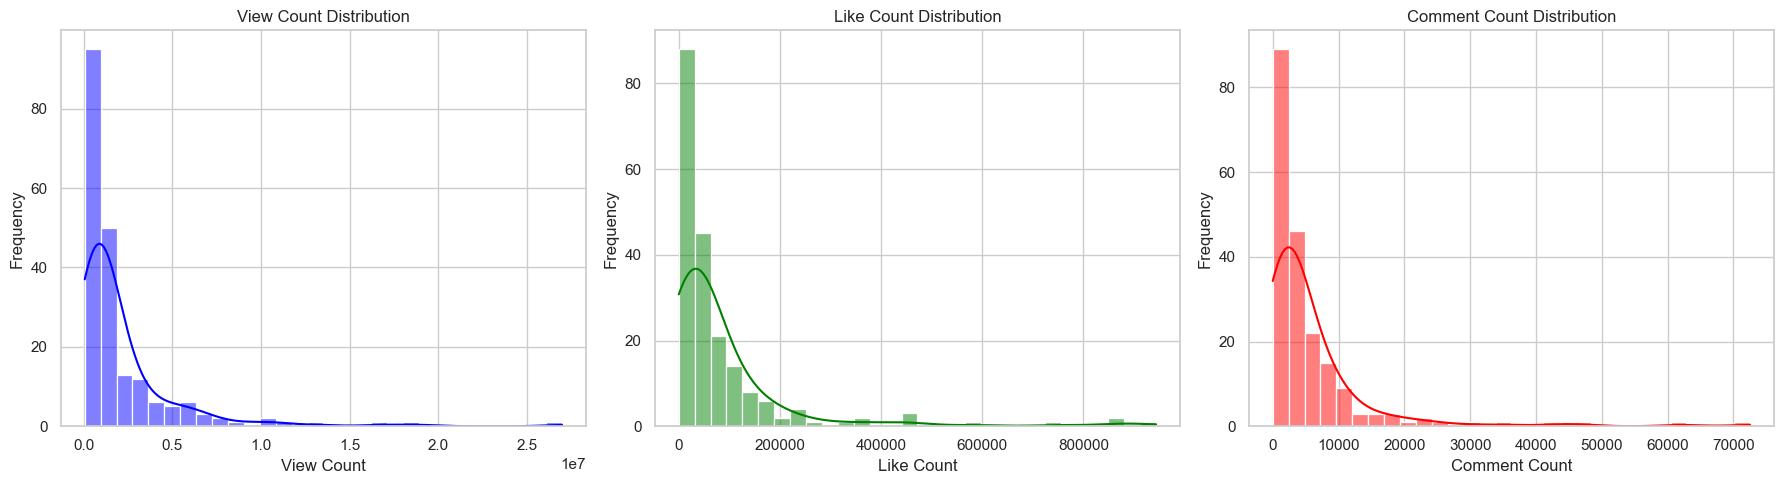

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

 # view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

 # like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

 # comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

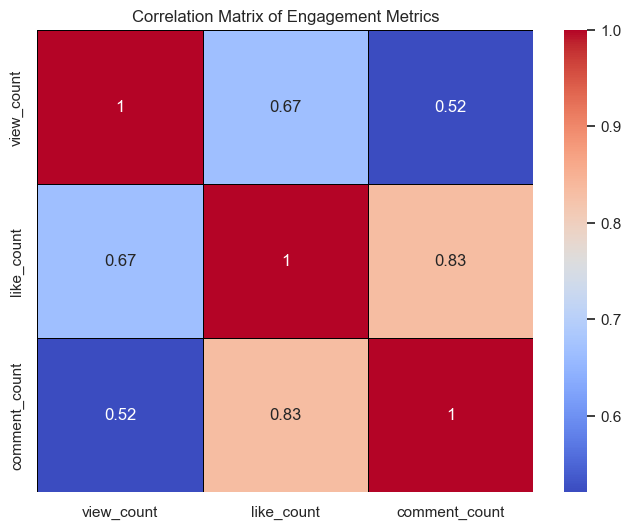

In [10]:
 # correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

In [11]:
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='CA'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

 # get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_20932/2888774359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')


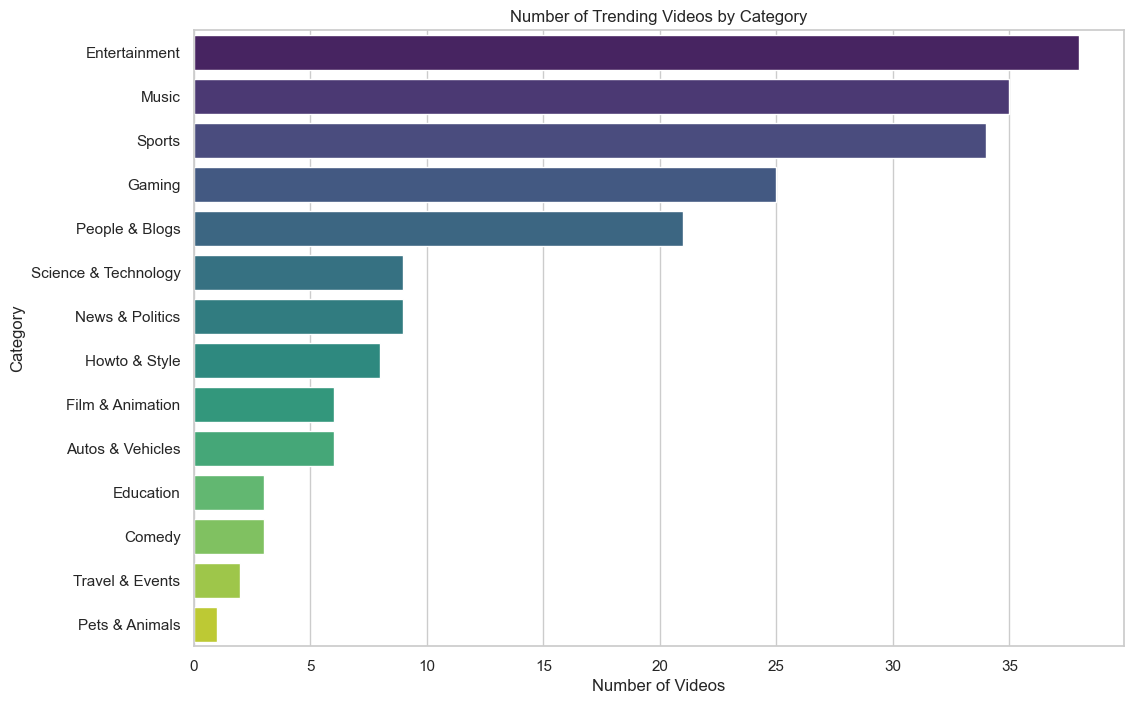

In [13]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

 # Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_10961/914170926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_10961/914170926.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_10961/914170926.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for th

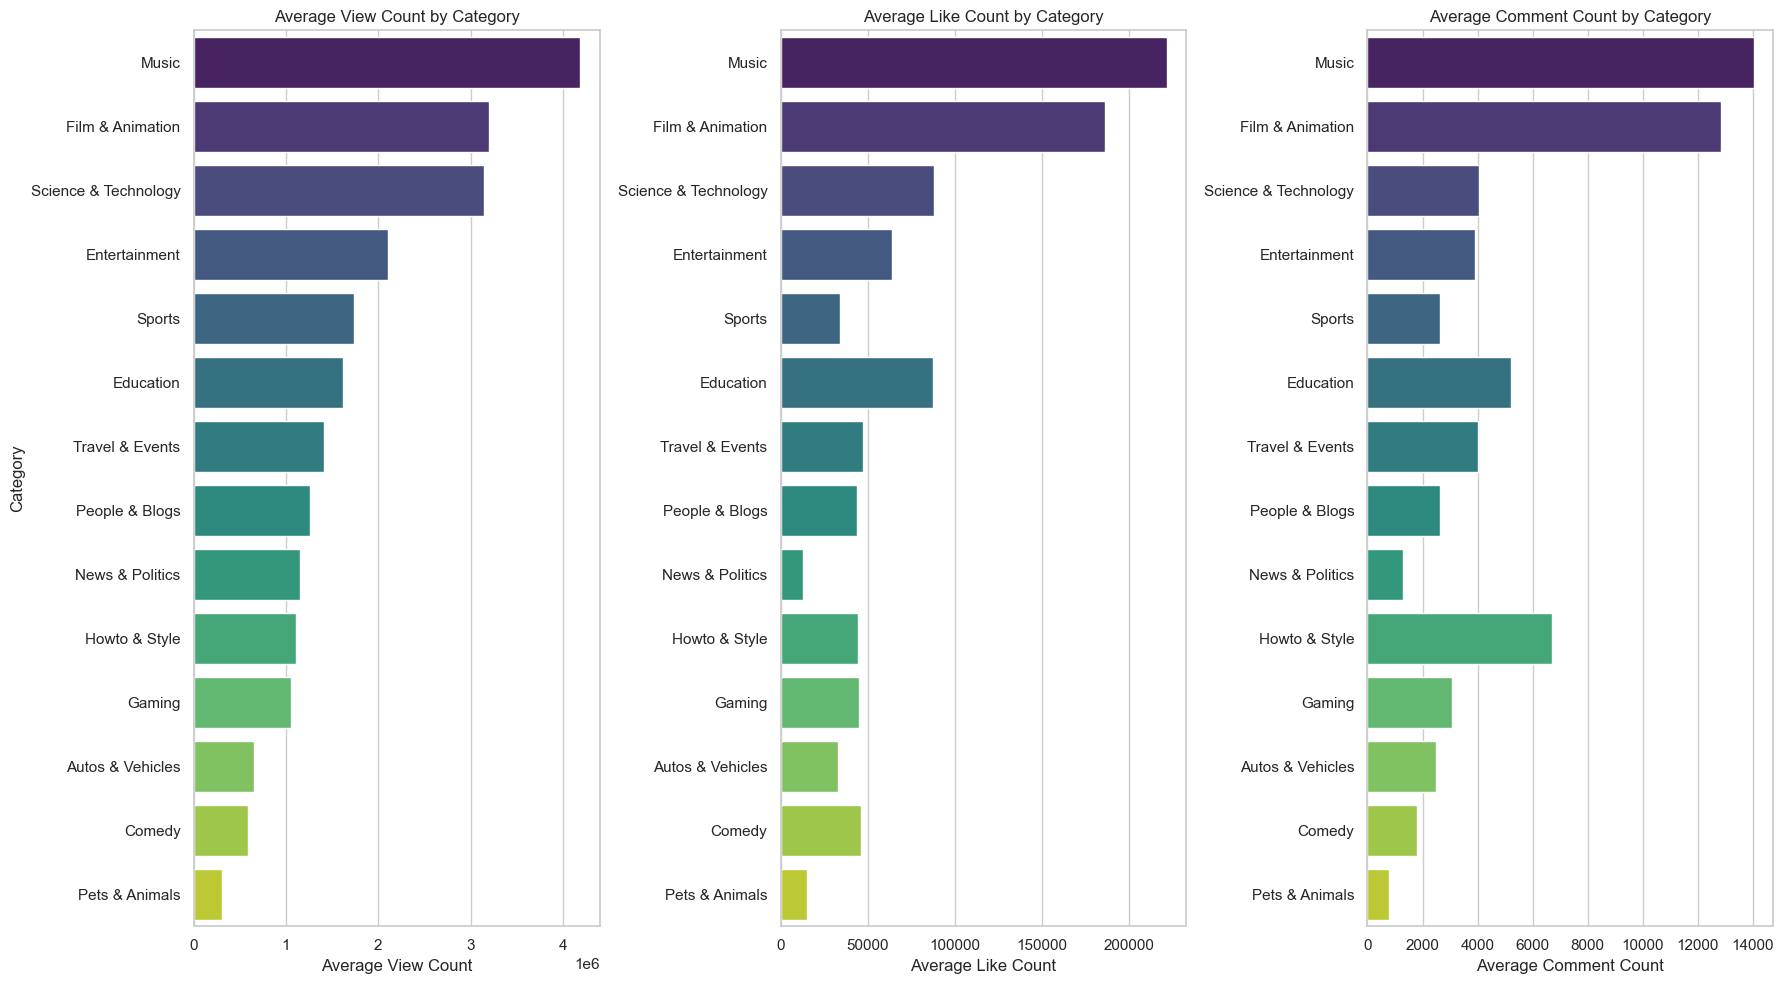

In [15]:
 # average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

 # view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

 # like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

 # comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

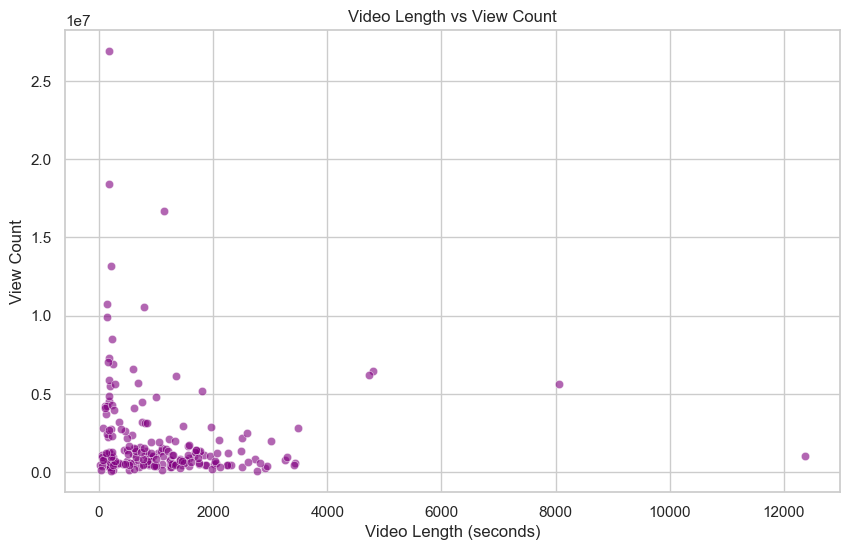

/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_10961/461876026.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_10961/461876026.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_10961/461876026.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

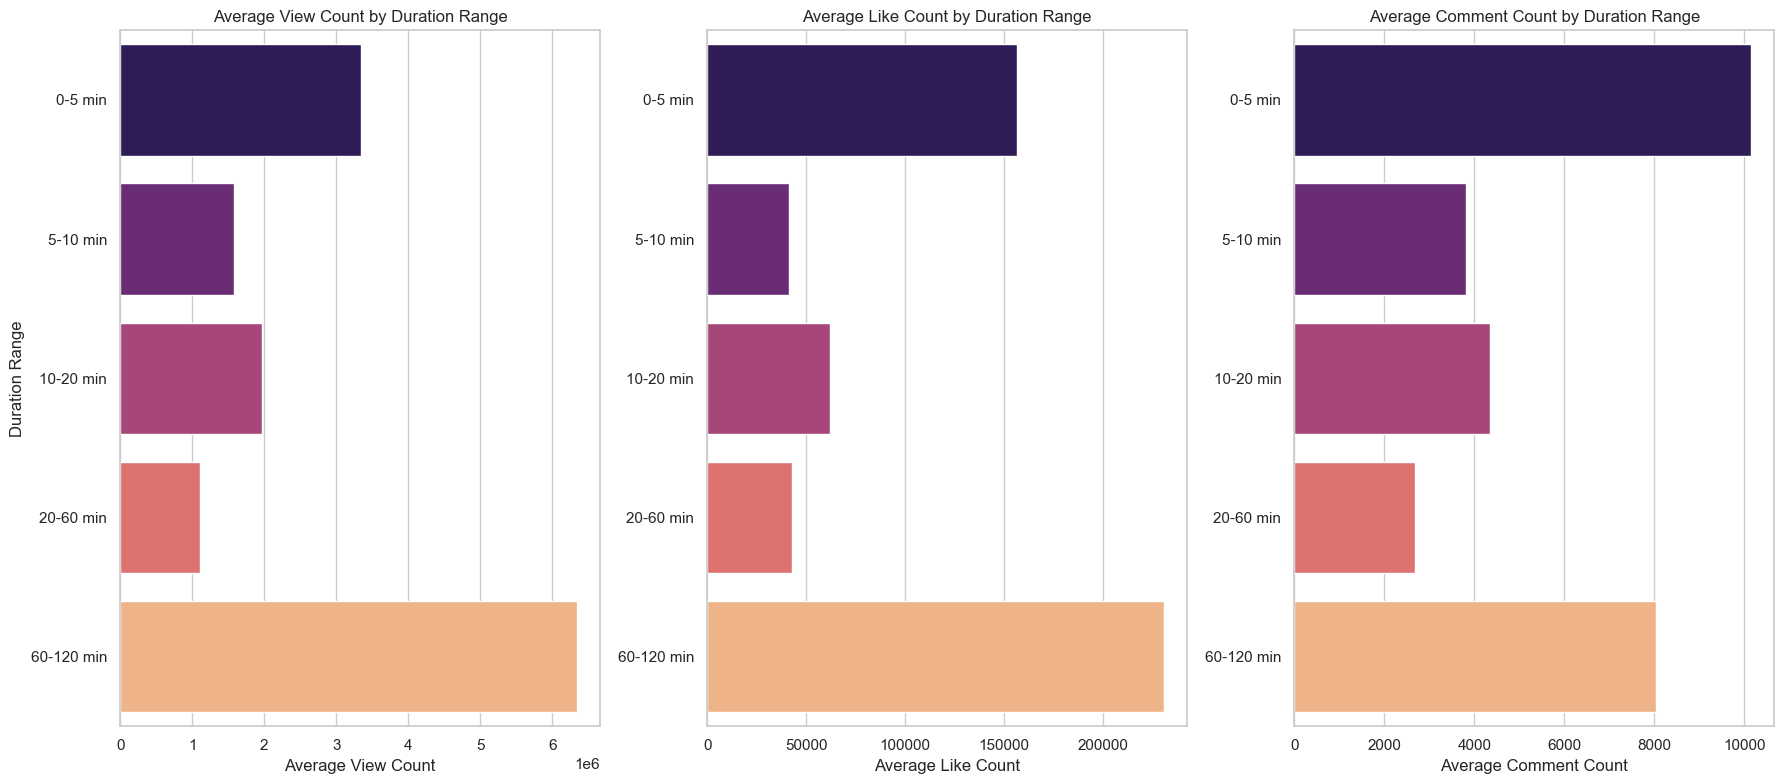

In [17]:
 # scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

 # bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

 # view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

 # like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

 # comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

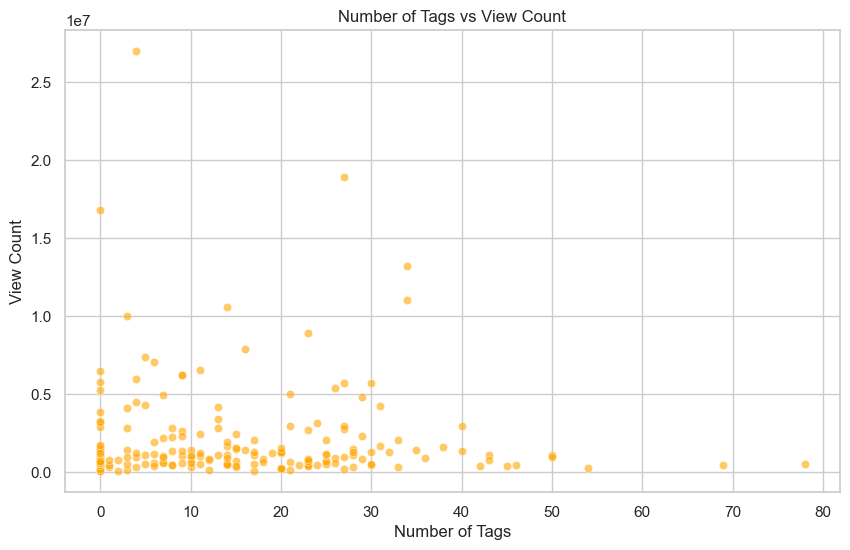

In [15]:
 # calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

 # scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

/var/folders/rz/3t1t73yj305fvj2vckvctvj40000gn/T/ipykernel_20932/2251207515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


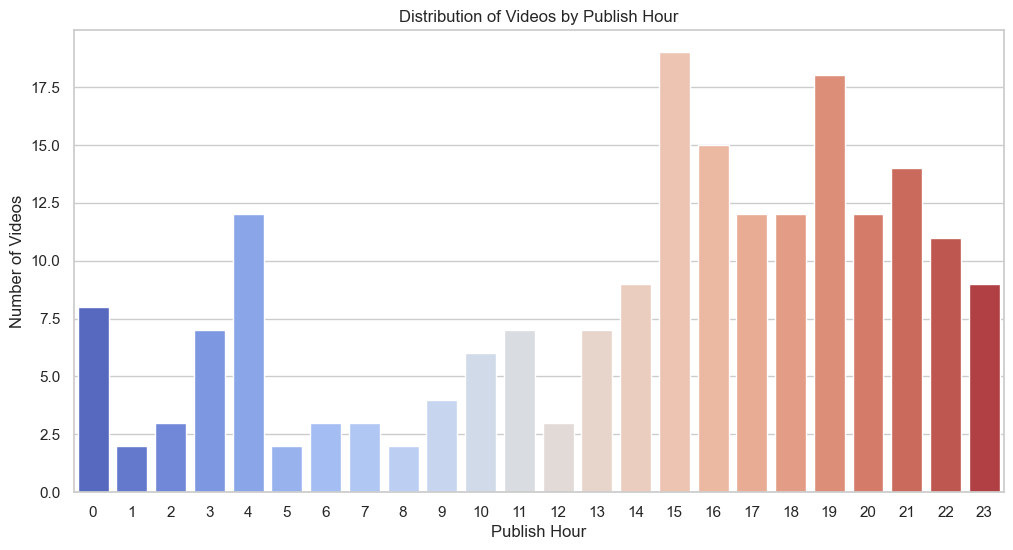

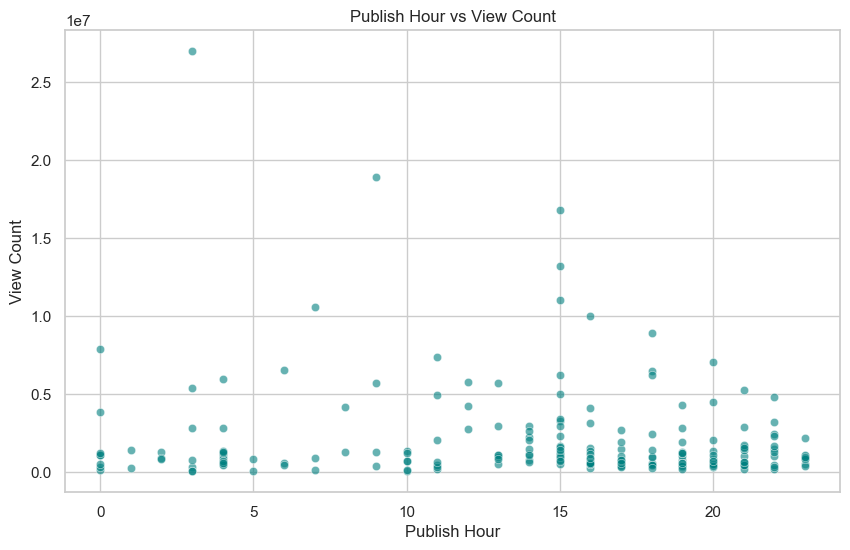

In [16]:
 # extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

 # bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

 # scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()